In [41]:
import numpy as np
import math
import matplotlib.pyplot as plt


'''初始化参数'''
initial_price = 50
exercise_price = 50
interest_rate = 0.1
q = 0
sigma = 0.40
N = 5
dividend_share = 0
dividend_date = 2
'''计算其他需要的参数'''
u = math.e**(sigma*math.sqrt(1/12))
d = 1/u
a = math.e**((interest_rate-q)*(1/12))
p = (a-d)/(u-d)

'''生成空白树，后面的股票价格树和股权价格树都在此基础上修改'''
def gen_blank_tree():
    global N
    tree=[]
    for i in range(N+1):
        tree_cut = []
        for j in range(i+1):
            tree_cut.append(0)
        tree.append(tree_cut)
    return tree

'''生成股票价格树'''
def gen_stock_price_tree():
    global initial_price, exercise_price, interest_rate,dividend_share, dividend_date, q, N, u, d, a, p
    tree = gen_blank_tree()
    for i in range(N+1):
        for j in range(i+1):
            if i <= dividend_date:
                tree[i][j] = initial_price*(u**i)*(d**(2*j))
            else:
                tree[i][j] = initial_price*(u**i)*(d**(2*j))*(1-dividend_share)
    return tree

'''产生欧式看跌期权价格树'''
def european_put_option_tree(stock_price_tree):
    global N, exercise_price
    european_put_option_tree = gen_blank_tree()
    for j in range(N+1):
        if stock_price_tree[N][j] >= exercise_price:
            european_put_option_tree[N][j] = 0
        else:
            european_put_option_tree[N][j] = exercise_price - stock_price_tree[N][j]
    for i in range(N-1, -1, -1):
        for j in range(i+1):
            european_put_option_tree[i][j] = p*european_put_option_tree[i+1][j]+(1-p)*european_put_option_tree[i+1][j+1]
    return european_put_option_tree

'''产生欧式看涨期权价格树'''
def european_call_option_tree(stock_price_tree):
    global N, exercise_price
    european_call_option_tree = gen_blank_tree()
    for j in range(N+1):
        if stock_price_tree[N][j] <= exercise_price:
            european_call_option_tree[N][j] = 0
        else:
            european_call_option_tree[N][j] = stock_price_tree[N][j] - exercise_price
    for i in range(N-1, -1, -1):
        for j in range(i+1):
            european_call_option_tree[i][j] = p*european_call_option_tree[i+1][j]+(1-p)*european_call_option_tree[i+1][j+1]
    return european_call_option_tree


'''定义美式看跌期权，从后往前检查是否符合交易规则'''
def america_put_option_tree(stock_price_tree):
    global N, exercise_price
    america_put_option_tree_temp = european_put_option_tree(stock_price_tree)
    for i in range(N-1, -1, -1): 
        for j in range(i+1):
            america_put_option_tree_temp[i][j] = max(0,exercise_price-stock_price_tree[i][j],
            america_put_option_tree_temp[i+1][j]*p+america_put_option_tree_temp[i+1][j+1]*(1-p))
    return america_put_option_tree_temp

'''定义美式看涨期权，从后往前检查是否符合交易规则'''
def america_call_option_tree(stock_price_tree):
    global N, exercise_price
    america_call_option_tree_temp = european_call_option_tree(stock_price_tree)
    for i in range(N-1, -1, -1):
        for j in range(i+1):
            america_call_option_tree_temp[i][j] = max(0,stock_price_tree[i][j]-exercise_price,
            america_call_option_tree_temp[i+1][j]*p+america_call_option_tree_temp[i+1][j+1]*(1-p))
    return america_call_option_tree_temp

'''打印为工整的表格样式'''
def print_tree(stock_price_tree, option_price_tree):
    for i in range(len(stock_price_tree)):
        print('\n----------------------------------------------------------------------------------------------------------------')
        for j in range(len(stock_price_tree)):
            if j < i:
                print('{0:>6.2f}'.format(0), end = ', ')
                print('{0:>6.2f}'.format(0), end = '  |  ')
            else:
                stock_price = float(stock_price_tree[j][i])
                option_price = float(option_price_tree[j][i])
                print('{0:>6.2f}'.format(stock_price), end = ', ')
                print('{0:>6.2f}'.format(option_price), end = '  |  ')
    print('\n----------------------------------------------------------------------------------------------------------------')
    return

       

print ('\n\n european_put_option_tree')
print_tree(gen_stock_price_tree(),european_put_option_tree(gen_stock_price_tree()))
print ('\n\n america_put_option_tree')
print_tree(gen_stock_price_tree(),america_put_option_tree(gen_stock_price_tree()))

print('\n')

print ('\n\n european_call_option_tree')
print_tree(gen_stock_price_tree(),european_call_option_tree(gen_stock_price_tree()))
print ('\n\n america_call_option_tree')
print_tree(gen_stock_price_tree(),america_call_option_tree(gen_stock_price_tree()))



 european_put_option_tree

----------------------------------------------------------------------------------------------------------------
 50.00,   4.50  |   56.12,   2.19  |   62.99,   0.65  |   70.70,   0.00  |   79.35,   0.00  |   89.07,   0.00  |  
----------------------------------------------------------------------------------------------------------------
  0.00,   0.00  |   44.55,   6.89  |   50.00,   3.77  |   56.12,   1.32  |   62.99,   0.00  |   70.70,   0.00  |  
----------------------------------------------------------------------------------------------------------------
  0.00,   0.00  |    0.00,   0.00  |   39.69,  10.11  |   44.55,   6.28  |   50.00,   2.69  |   56.12,   0.00  |  
----------------------------------------------------------------------------------------------------------------
  0.00,   0.00  |    0.00,   0.00  |    0.00,   0.00  |   35.36,  14.04  |   39.69,   9.98  |   44.55,   5.45  |  
-----------------------------------------------------------

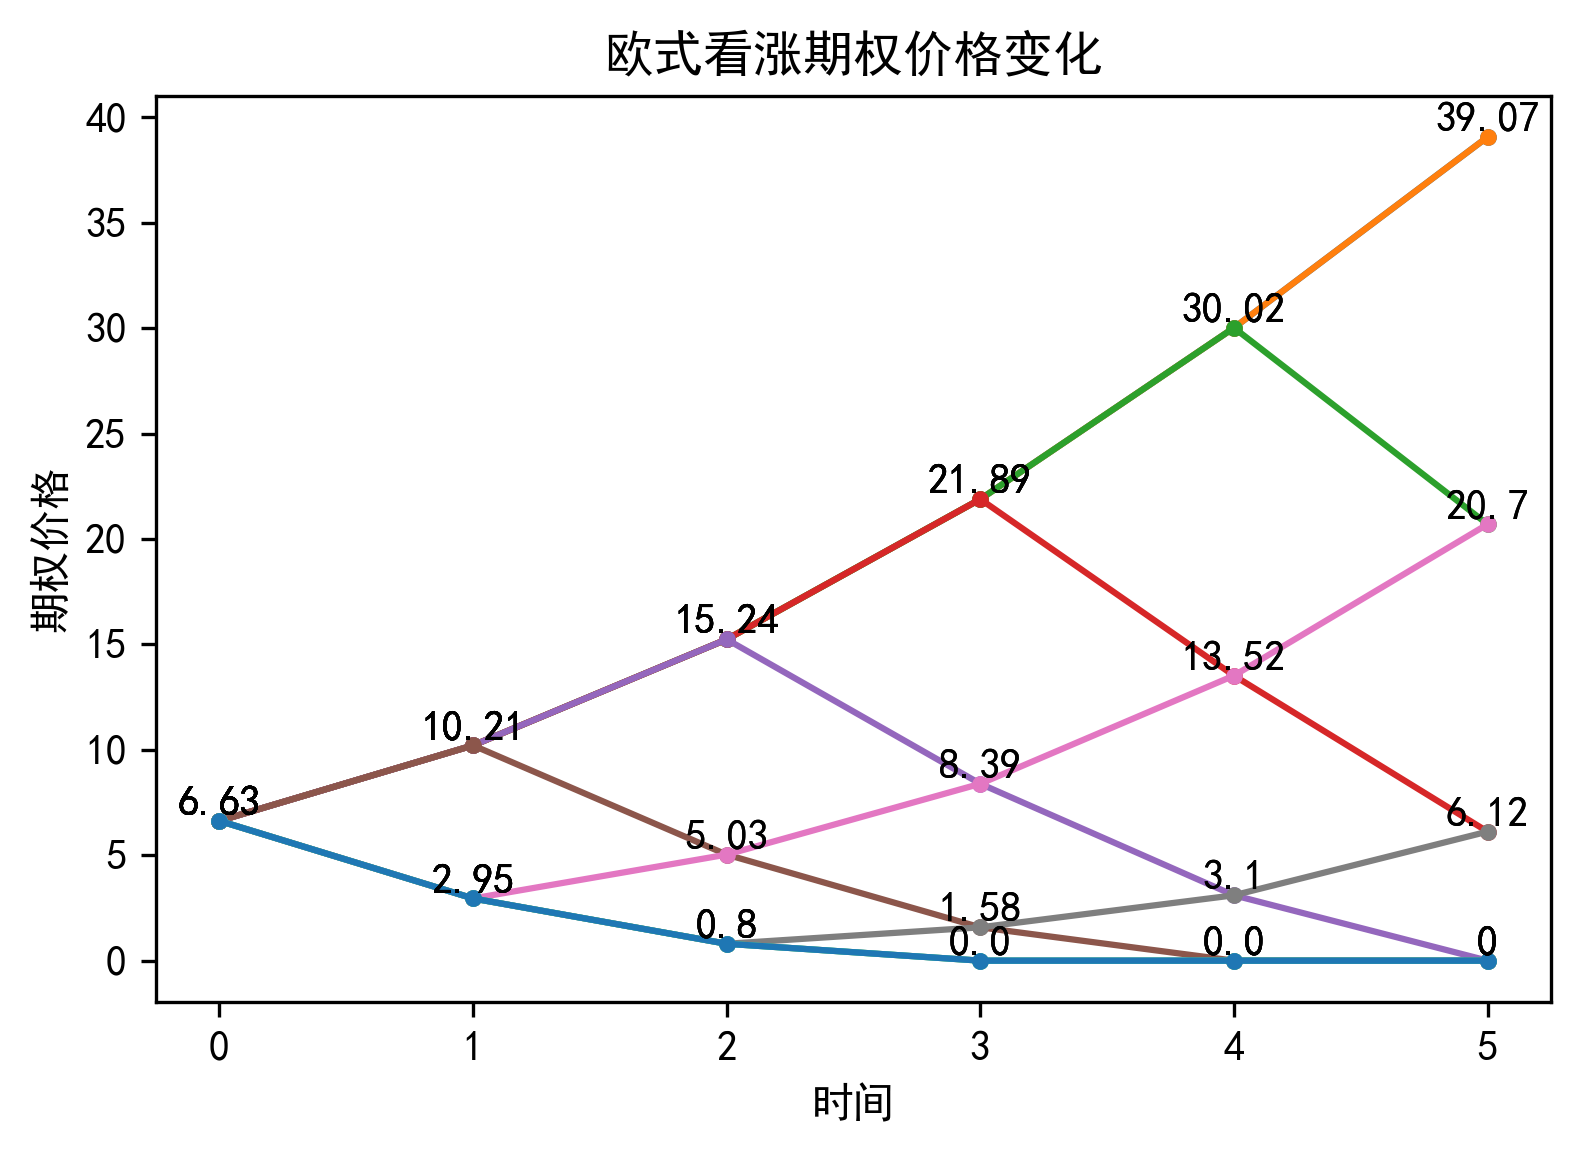

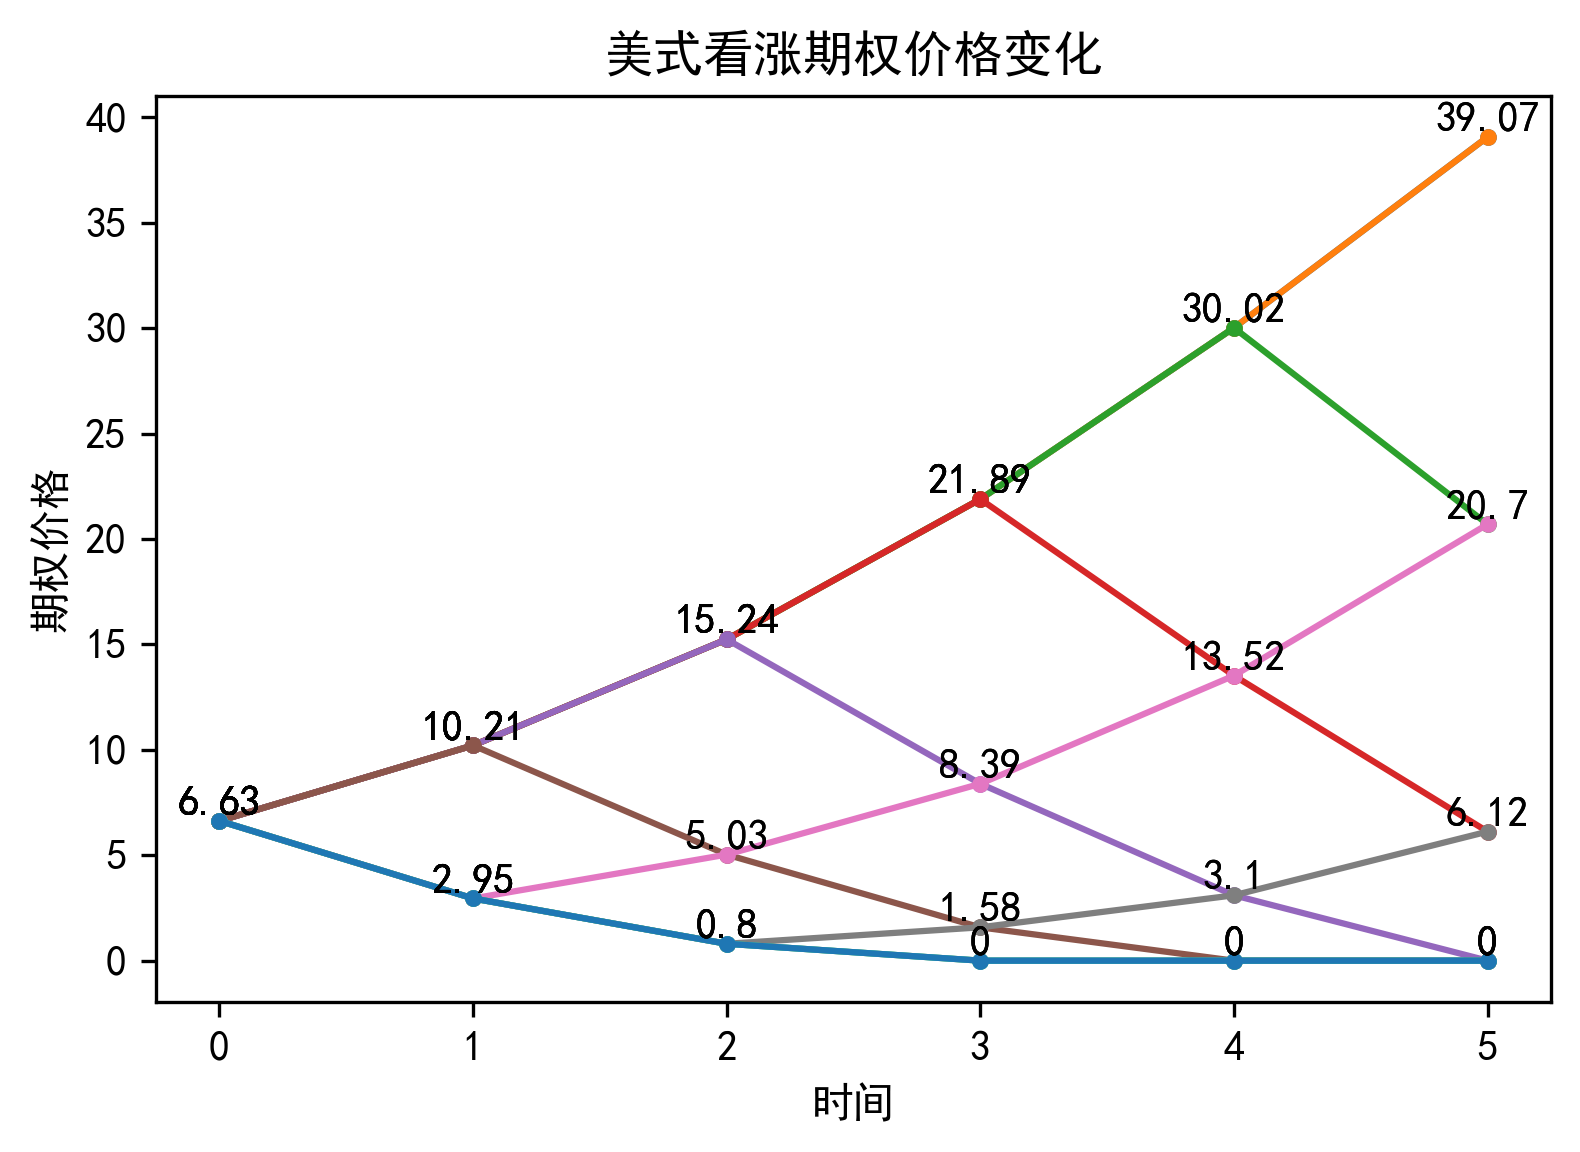

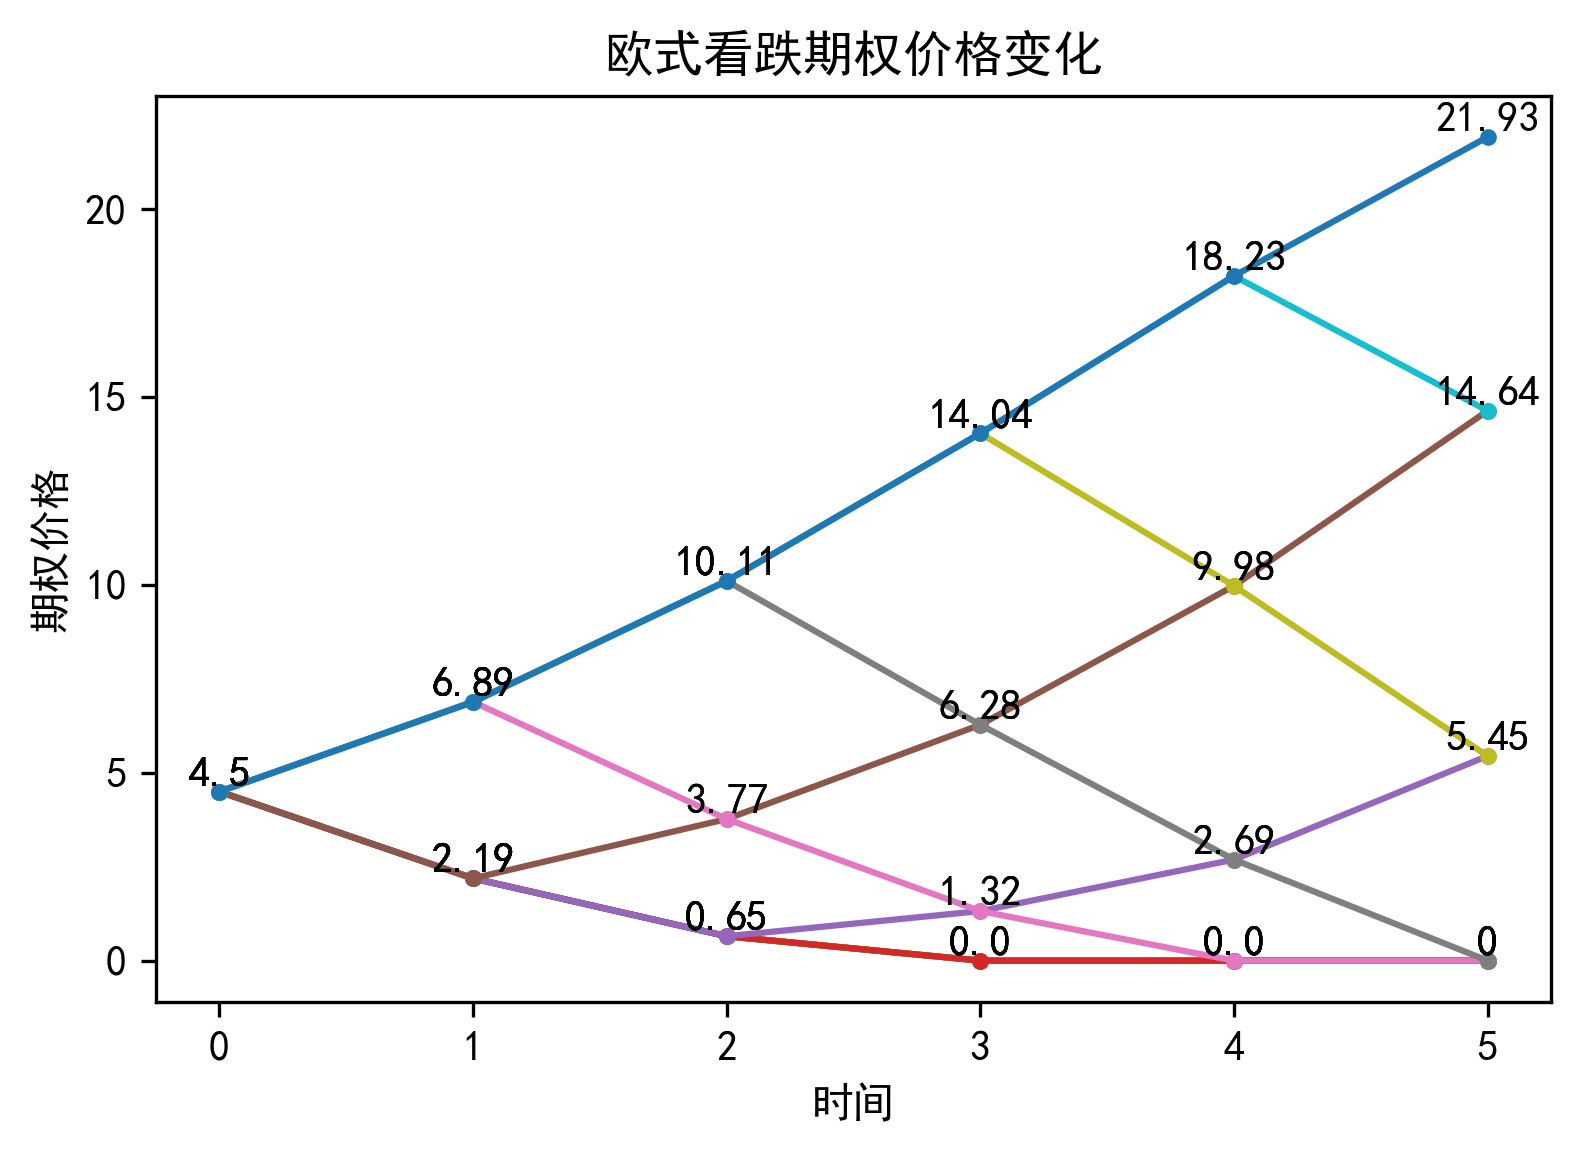

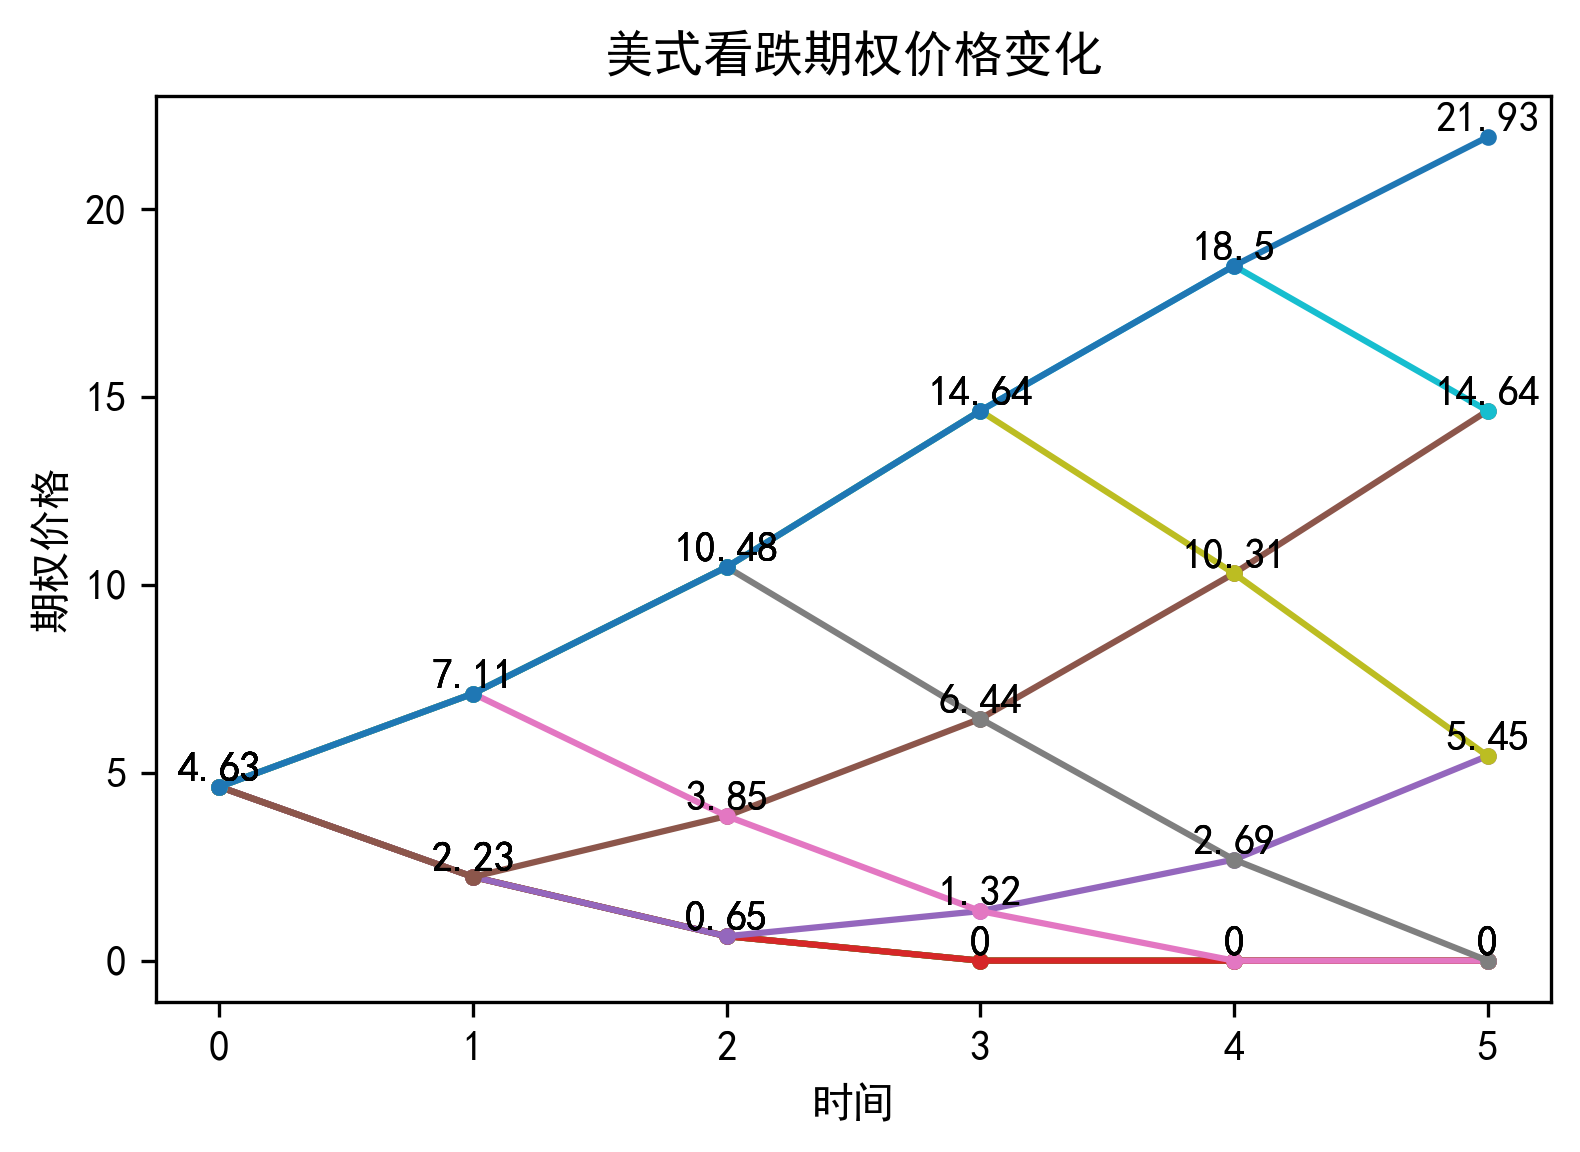

In [36]:

import matplotlib.pyplot as plt

'''生成一个y的列表，列表的每一项是一个小列表，代表一个y的取值集合'''
def get_y_list(tree):
    y_list = []
    for i in range(len(tree)):
        y = []
        for j in range(len(tree)):
            if j <= (len(tree) - i):
                y.append(round(tree[j][0],2))
            else:
                y.append(round(tree[j][i+j-len(tree)],2))
        y_list.append(y)
    for i in range(len(tree)-1):
        y = []
        for j in range(len(tree)):
            if j <= (i+1):
                y.append(round(tree[j][j],2))
            else:
                y.append(round(tree[j][i+1],2))
        y_list.append(y)
    return y_list



x = []
for i in range(N+1):
    x.append(i)
y_list_european_call = get_y_list(european_call_option_tree(gen_stock_price_tree()))
y_list_european_put = get_y_list(european_put_option_tree(gen_stock_price_tree()))
y_list_america_call = get_y_list(america_call_option_tree(gen_stock_price_tree()))
y_list_america_put = get_y_list(america_put_option_tree(gen_stock_price_tree()))


'''画欧式看涨期权折线图'''
plt.figure(dpi=300) 
plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示汉字
plt.xlabel('时间')  # x轴标题
plt.ylabel('期权价格')  # y轴标题
plt.title('欧式看涨期权价格变化')
for y in y_list_european_call:
    plt.plot(x, y, marker='o', markersize=3)

for y in y_list_european_call:
    for a, b in zip(x, y):
        plt.text(a, b, b, ha='center', va='bottom', fontsize=10)  # 设置数据标签位置及大小
        
plt.show()  # 显示折线图


'''画美式看涨期权折线图'''
plt.figure(dpi=300) 
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.xlabel('时间') 
plt.ylabel('期权价格')  
plt.title('美式看涨期权价格变化')
for y in y_list_america_call:
    plt.plot(x, y, marker='o', markersize=3)

for y in y_list_america_call:
    for a, b in zip(x, y):
        plt.text(a, b, b, ha='center', va='bottom', fontsize=10) 
        
plt.show()  


'''画欧式看跌期权折线图'''
plt.figure(dpi=300) 
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.xlabel('时间')  
plt.ylabel('期权价格')  
plt.title('欧式看跌期权价格变化')
for y in y_list_european_put:
    plt.plot(x, y, marker='o', markersize=3)

for y in y_list_european_put:
    for a, b in zip(x, y):
        plt.text(a, b, b, ha='center', va='bottom', fontsize=10)  
        
plt.show()  


'''画美式看跌期权折线图'''
plt.figure(dpi=300) 
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.xlabel('时间')  
plt.ylabel('期权价格')  
plt.title('美式看跌期权价格变化')
for y in y_list_america_put:
    plt.plot(x, y, marker='o', markersize=3)

for y in y_list_america_put:
    for a, b in zip(x, y):
        plt.text(a, b, b, ha='center', va='bottom', fontsize=10) 

plt.show()  


Text(0.5, 1.0, '美式看跌期权价格变化散点图')

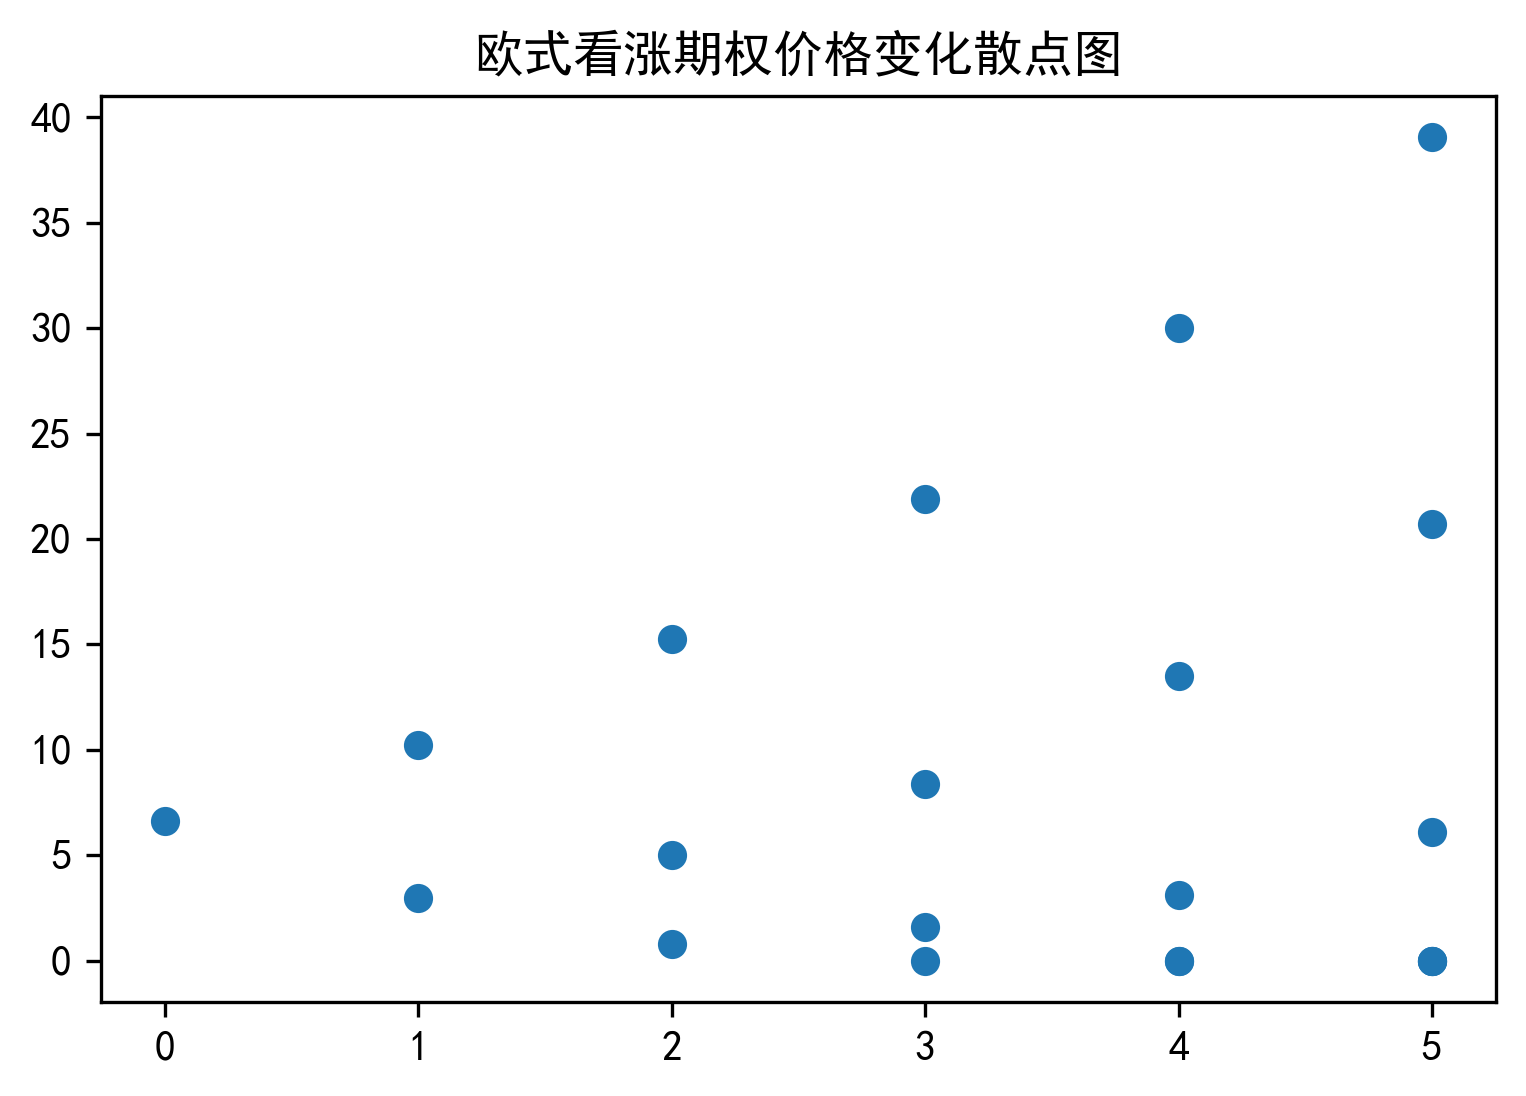

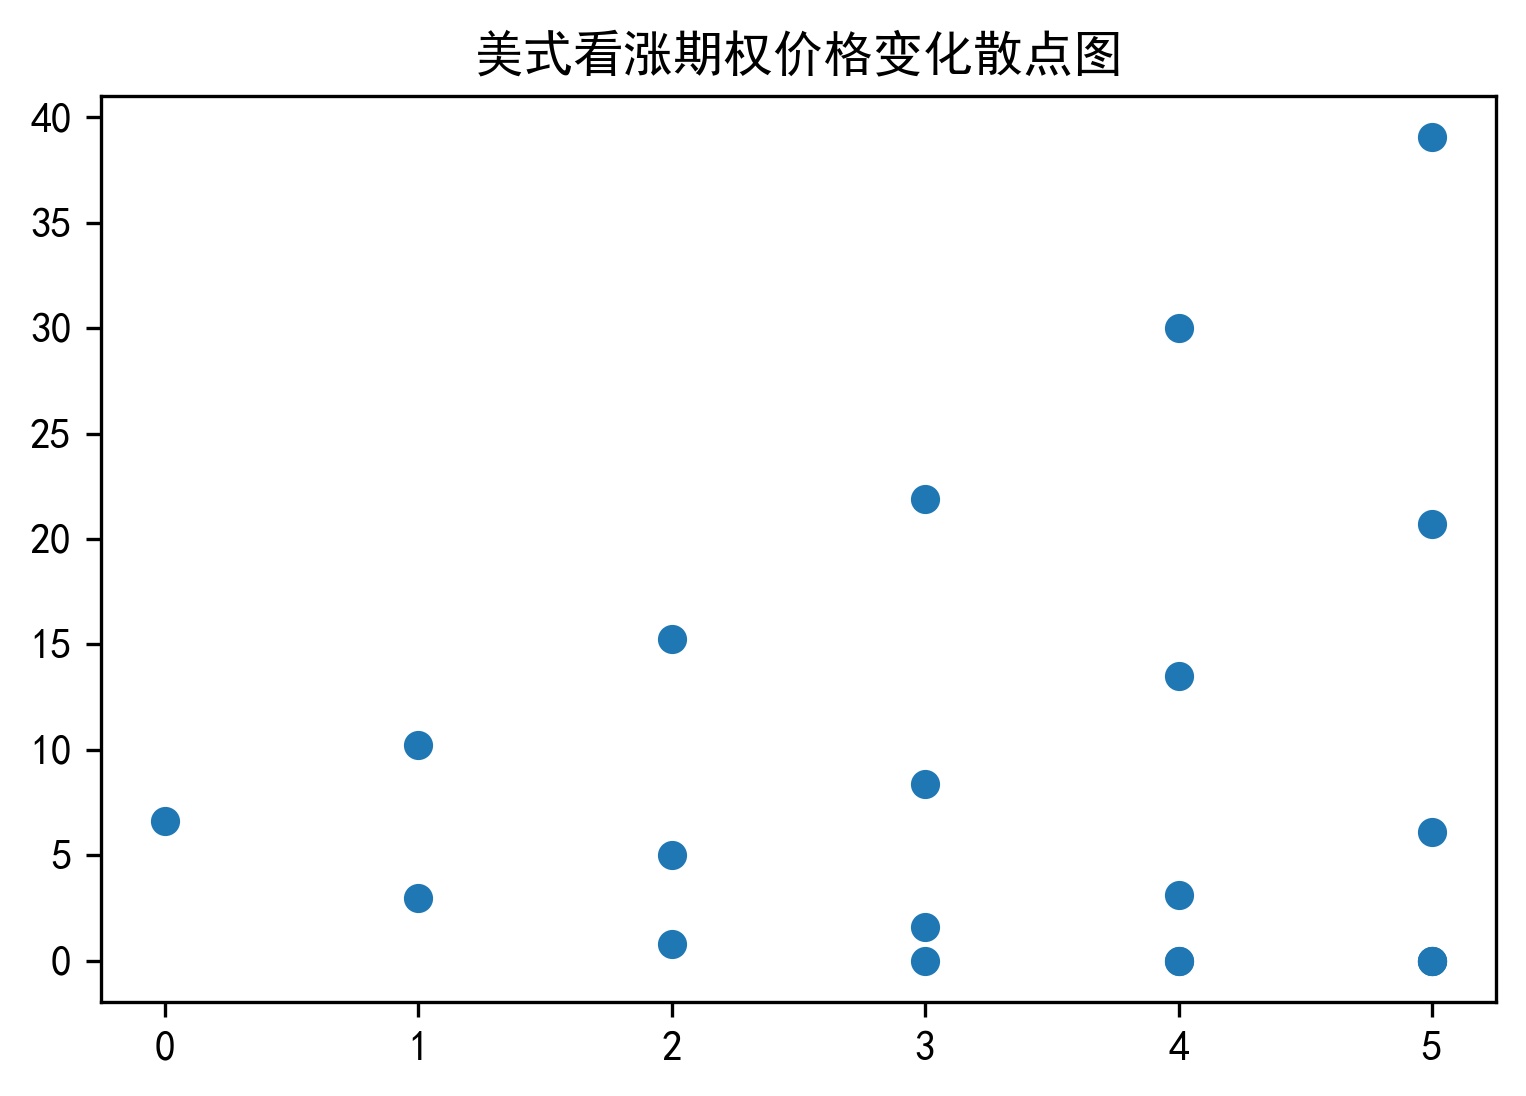

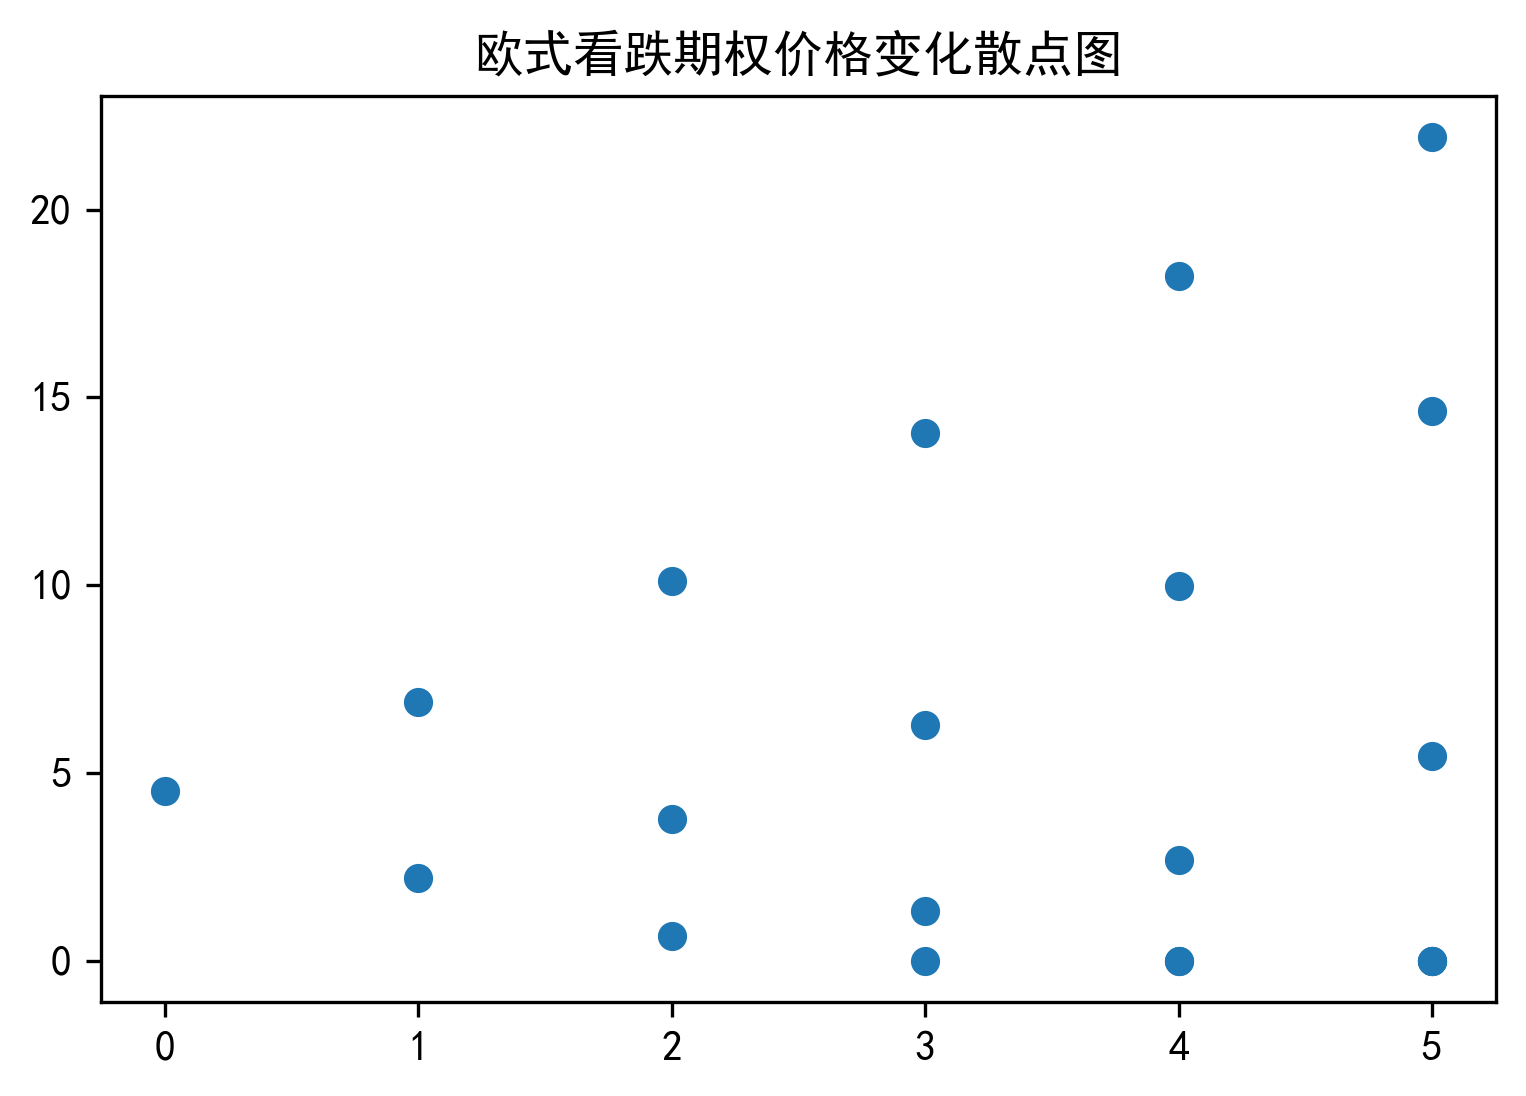

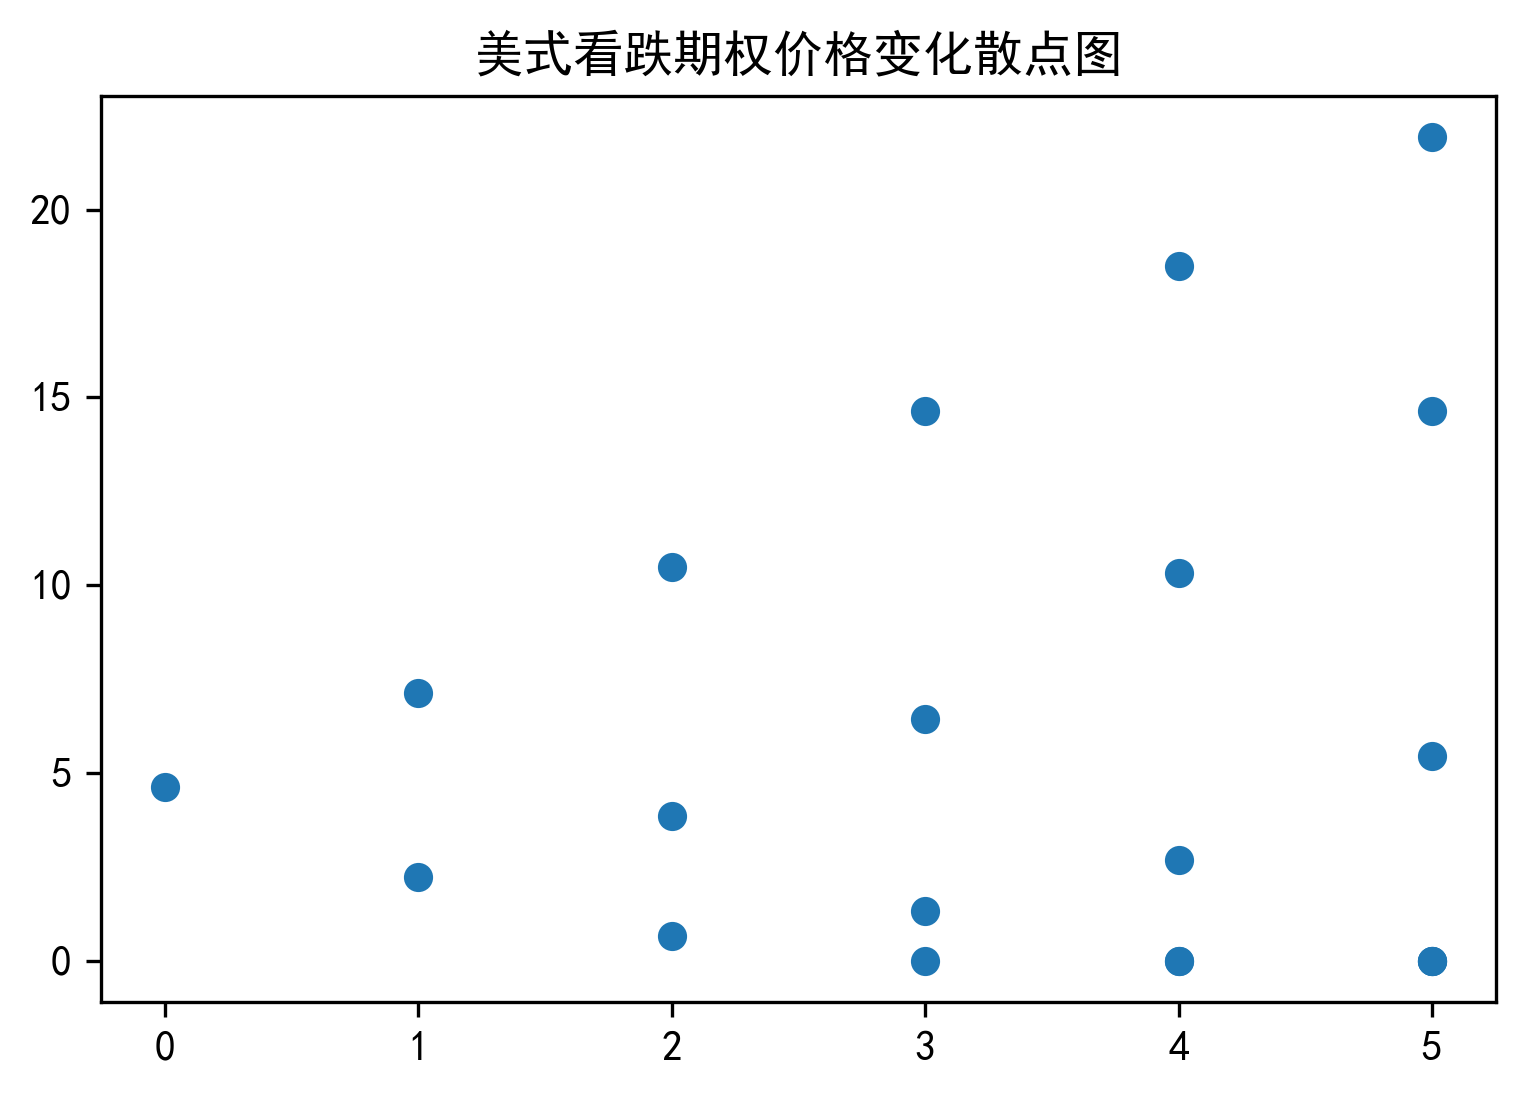

In [39]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
import numpy as np



x=[]
for i in range(N+1):
    for j in range(i+1):
        x.append(i)

y_european_call=[]
for i in range(N+1):
    for j in range(i+1):
        y_european_call.append(european_call_option_tree(gen_stock_price_tree())[i][j])

y_america_call=[]
for i in range(N+1):
    for j in range(i+1):
        y_america_call.append(america_call_option_tree(gen_stock_price_tree())[i][j])
        

y_european_put=[]
for i in range(N+1):
    for j in range(i+1):
        y_european_put.append(european_put_option_tree(gen_stock_price_tree())[i][j])

y_america_put=[]
for i in range(N+1):
    for j in range(i+1):
        y_america_put.append(america_put_option_tree(gen_stock_price_tree())[i][j])
        
        
        
plt.figure(dpi=300)
plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.title("欧式看涨期权价格变化散点图")
plt.scatter(x,y_european_call)


plt.figure(dpi=300)
plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.scatter(x,y_america_call)
plt.title("美式看涨期权价格变化散点图")

plt.figure(dpi=300)
plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.scatter(x,y_european_put)
plt.title("欧式看跌期权价格变化散点图")

plt.figure(dpi=300)
plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.scatter(x,y_america_put)
plt.title("美式看跌期权价格变化散点图")